In [71]:
# https://github.com/lusob/gym-ple
%matplotlib inline
import time

import gym
import gym_ple
import matplotlib
from matplotlib.pyplot import imshow, show
from collections import deque
# from skimage import color, transform

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

import warnings
warnings.filterwarnings('ignore')

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
    
env = gym.make('FlappyBird-v0').unwrapped


In [28]:
env.action_space, env.observation_space

(Discrete(2), Box(512, 288, 3))

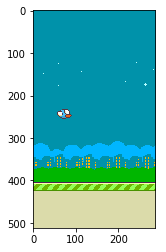

In [20]:
state = env.reset()
next_state, reward, done, _ = env.step(1)
plt.imshow(next_state)

In [88]:
transform = T.Compose([T.ToPILImage(),
                       T.Grayscale(),
                       T.Resize((80,45)),
                       T.ToTensor()])

def preprocess_frame(frame):
    new_frame = frame[:400, 40:]

    return transform(new_frame)

In [92]:
toPIL = T.ToPILImage()

In [69]:
def preprocess_frame(frame):
    
    cropped = frame[:400, 40:]
    gray = color.rgb2gray(cropped)
    normalized = gray/255.0
    
    resized = transform.resize(normalized, (80, 45))
    
    return resized

In [91]:
t= preprocess_frame(next_state)
# plt.imshow(t)
t.size()

torch.Size([1, 80, 45])

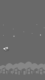

In [93]:
toPIL(t)

In [ ]:
stack_size = 4

def stack_frames(stacked_frame, frame, new_episode: True):
    if new_episode:
        

0

In [6]:
env.observation_space

Box(512, 288, 3)

In [10]:
state = env.reset()

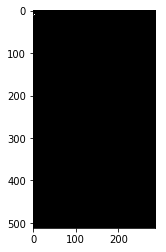

In [13]:
plt.imshow(state)

In [18]:
state = env.render(mode='rgb_array')

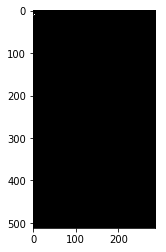

In [19]:
plt.imshow(state)

In [22]:
next_state = env.step(1)

In [ ]:
# next_state

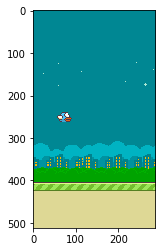

In [25]:
plt.imshow(next_state[0])

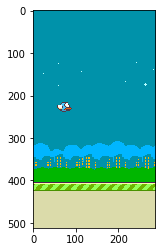

KeyboardInterrupt: 

In [14]:
env.seed(0)
agent = RandomAgent(env.action_space)

episode_count = 100
reward = 0
done = False

for i in range(episode_count):
    ob = env.reset()

    while True:
        action = agent.act(ob, reward, done)

        ob, reward, done, _ = env.step(action)
        
#         print(ob)
        clear_output(wait=True)
        plt.imshow(ob)
        show()
        time.sleep(.1)
        
        if done:
            break
        # Note there's no env.render() here. But the environment still can open window and
        # render if asked by env.monitor: it calls env.render('rgb_array') to record video.
        # Video is not recorded every episode, see capped_cubic_video_schedule for details.
